In [37]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import sys
import os
from src.kde import *
from src.cdf import *
from src.pinball_crps import *
from src.poly_fit import *
from src.spline import *
from scipy import interpolate
from src.miscellaneous import find
from src.kernel_herding import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
xtrain = np.load("data/data_21_23.npy")
# data 2023 test data
xtest=xtrain[365:,:]
# data 2021 train data
xtrain=xtrain[0:366,:]
# m rows
m=xtrain.shape[0]
# n columns
n=xtrain.shape[1]


# select hour of interest
n=8

# reshape
xtrain_n=xtrain[1:, n].reshape(1,m-1)
xtest_n=xtest[1:, n]


In [39]:
x=xtrain_n.reshape(xtrain_n.size,)
x=np.sort(x)
y=cdf_funct(x)


In [40]:
x_sub, y_sub,fit_spl_rpol=spl_polyfit(x,y)

# rational polynomial fit order 1
# higher orders do not preserve properties of CDF
fit_rpol=polyfit(y,beta_rat_polyfit(y, np.sort(x), order=1))

# scipy inbuilt spline
tck_sub = interpolate.splrep(y_sub,x_sub, s=0, k=3)
fit_bspl_sub=interpolate.BSpline(*tck_sub)(y_sub)

tck = interpolate.splrep(y,x, k=3)
fit_bspl = interpolate.BSpline(*tck)(y)

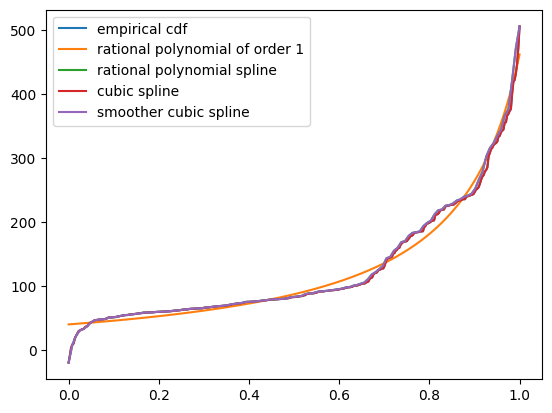

In [41]:
plt.plot(y, np.sort(x), label="empirical cdf")
plt.plot(y, fit_rpol, label="rational polynomial of order 1")
plt.plot(y_sub, fit_spl_rpol, label="rational polynomial spline")


plt.plot(y, fit_bspl, label="cubic spline")
plt.plot(y_sub, fit_bspl_sub, label="smoother cubic spline")
plt.legend()

In [42]:
# simulate data
np.random.seed(10)
unif=np.random.uniform(0,1,xtrain_n.size)
unif=np.sort(unif)

sim_rpol=polyfit(unif,beta_rat_polyfit(y, np.sort(x), order=1))
sim_spl_rpol=simulate_spl_polyfit(unif,y_sub, fit_spl_rpol)
sim_bspl_sub=interpolate.BSpline(*tck_sub)(unif)

np.save("data/simulations/sim_rpol.npy",sim_rpol)
np.save("data/simulations/sim_bspl_sub.npy",sim_bspl_sub)
np.save("data/simulations/sim_spl_rpol.npy",sim_spl_rpol)


In [81]:
sim_kernel_herding=kernel_herding(xtrain_n.reshape(-1,1) ,xtrain_n.size,1)
np.save("data/simulations/sim_kernel_herding.npy",sim_kernel_herding)

step.1 step.2 step.3 step.4 step.5 

/Users/luca/Desktop/SummerProjectInternship/ThesisKernelMethods/src/kernel_herding.py:55: OptimizeWarning: Unknown solver options: xtol
  res = minimize(f,


step.6 step.7 step.8 step.9 step.10 step.11 step.12 step.13 step.14 step.15 step.16 step.17 step.18 step.19 step.20 step.21 step.22 step.23 step.24 step.25 step.26 step.27 step.28 step.29 step.30 step.31 step.32 step.33 step.34 step.35 step.36 step.37 step.38 step.39 step.40 step.41 step.42 step.43 step.44 step.45 step.46 step.47 step.48 step.49 step.50 step.51 step.52 step.53 step.54 step.55 step.56 step.57 step.58 step.59 step.60 step.61 step.62 step.63 step.64 step.65 step.66 step.67 step.68 step.69 step.70 step.71 step.72 step.73 step.74 step.75 step.76 step.77 step.78 step.79 step.80 step.81 step.82 step.83 step.84 step.85 step.86 step.87 step.88 step.89 step.90 step.91 step.92 step.93 step.94 step.95 step.96 step.97 step.98 step.99 step.100 step.101 step.102 step.103 step.104 step.105 step.106 step.107 step.108 step.109 step.110 step.111 step.112 step.113 step.114 step.115 step.116 step.117 step.118 step.119 step.120 step.121 step.122 step.123 step.124 step.125 step.126 step.127 

In [8]:
# code to evaluate spline with Neville's algorithm
spline_evaluate(1, tck)

506.23